In [1]:
import arviz as az
import os.path as op
import pandas as pd
from tms_risk.cogmodels.fit_model import build_model, get_data
import pymc as pm

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
bids_folder = '/data/ds-tmsrisk'

In [3]:
idata = {}
models = {}

for model_label in ['1', 'flexible1']:
    idata[model_label] = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))
    df = get_data(bids_folder, model_label)
    models[model_label] = build_model(model_label, df)
    models[model_label].build_estimation_model()

    if 'log_likelihood' not in idata[model_label]:
        with models[model_label].estimation_model:
            pm.compute_log_likelihood(idata[model_label])




/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:81: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


Dropping the baseline condition


/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:81: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


Dropping the baseline condition


In [4]:
comparison = az.compare(idata)

/Users/gdehol/mambaforge/lib/python3.10/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/gdehol/mambaforge/lib/python3.10/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


In [5]:
comparison

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
1,0,-4136.520726,198.485330,0.000000,0.651715,46.887667,0.000000,True,log
flexible1,1,-4165.067598,260.191402,28.546872,0.348285,47.730527,14.037077,True,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

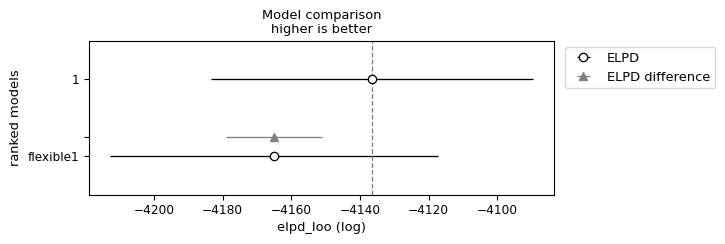

In [6]:
az.plot_compare(comparison)

In [7]:
n1 = idata['1'].posterior['n1_evidence_sd'].to_dataframe().xs('stimulation_condition[T.vertex]', 0, 'n1_evidence_sd_regressors')
def get_ci(d):
    return az.hdi(d.values.ravel())

sns.catplot(data=n1.reset_index(), x='subject', y='n1_evidence_sd', kind='point', errorbar=get_ci, aspect=3., )
plt.axhline(0.0, c='k')

NameError: name 'sns' is not defined

In [8]:
n2 = idata['1'].posterior['n2_evidence_sd'].to_dataframe().xs('stimulation_condition[T.vertex]', 0, 'n2_evidence_sd_regressors')
def get_ci(d):
    return az.hdi(d.values.ravel())

sns.catplot(data=n2.reset_index(), x='subject', y='n2_evidence_sd', kind='point', errorbar=get_ci, aspect=3., )
plt.axhline(0.0, c='k')

NameError: name 'sns' is not defined

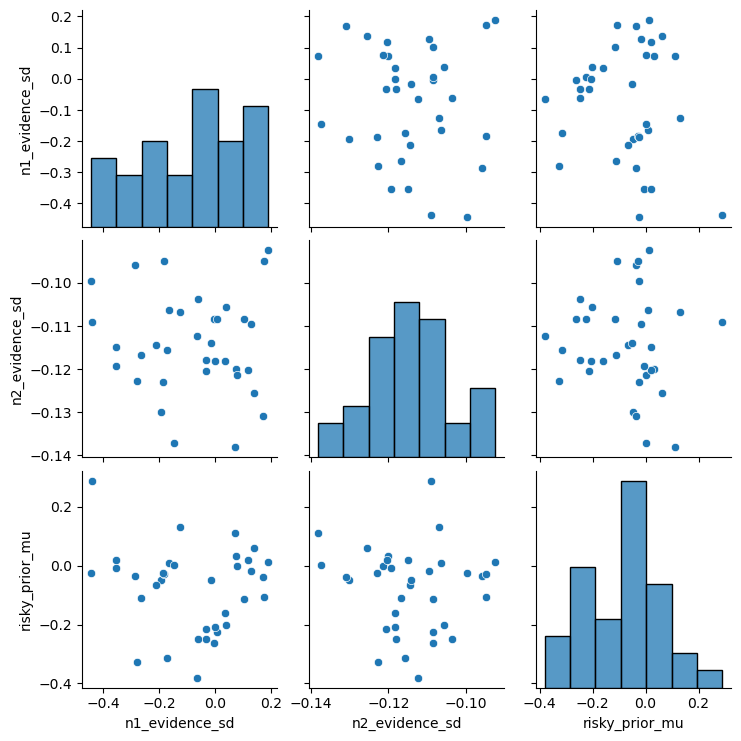

In [ ]:
n1 = idata['1'].posterior['n1_evidence_sd'].to_dataframe().xs('stimulation_condition[T.vertex]', 0, 'n1_evidence_sd_regressors').groupby('subject').mean()
n2 = idata['1'].posterior['n2_evidence_sd'].to_dataframe().xs('stimulation_condition[T.vertex]', 0, 'n2_evidence_sd_regressors').groupby('subject').mean()
risky_prior_mu = idata['1'].posterior['risky_prior_mu'].to_dataframe().xs('stimulation_condition[T.vertex]', 0, 'risky_prior_mu_regressors').groupby('subject').mean()

df = pd.concat((n1, n2, risky_prior_mu), axis=1)

df.corr()

import seaborn as sns
sns.pairplot(df)